<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#Task 1: familiarize with the dataset
print(boston_df.info())
#boston_df.drop(columns = ['Unnamed: 0'], inplace = True)
boston_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# TASK 2

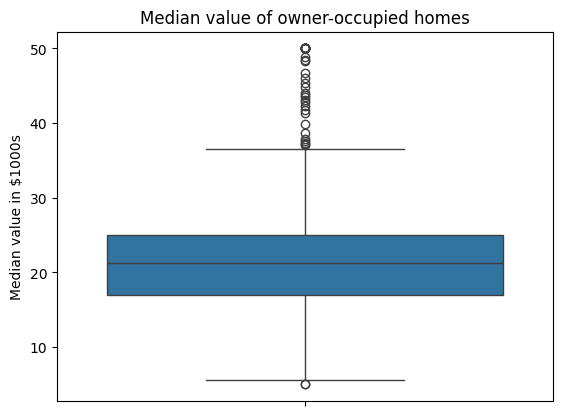

In [6]:
#Task 2.1: boxplot for Median value of owner occupied homes
ax = sns.boxplot(boston_df['MEDV'])
ax.set_title('Median value of owner-occupied homes')
ax.set_ylabel('Median value in $1000s')
pyplot.show()

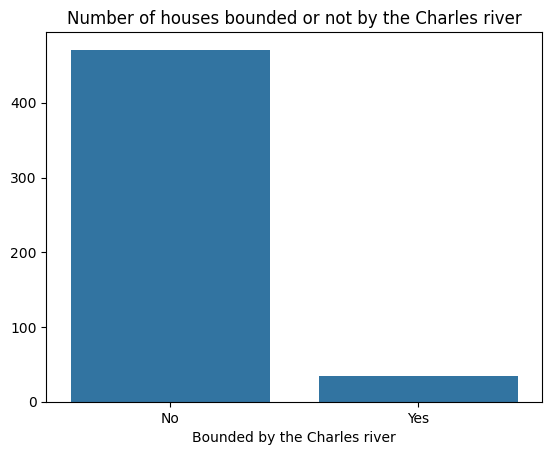

In [7]:
#Task 2.2: barplot for Charles rive variable
charles_df = boston_df.groupby('CHAS').agg('count').reset_index()

ax = sns.barplot(x ='CHAS', y ='CRIM', data = charles_df)
ax.set_title('Number of houses bounded or not by the Charles river')
ax.set_ylabel('')
ax.set_xlabel('Bounded by the Charles river')
ax.set_xticks(ax.get_xticks(), labels = ['No','Yes'])
pyplot.show()

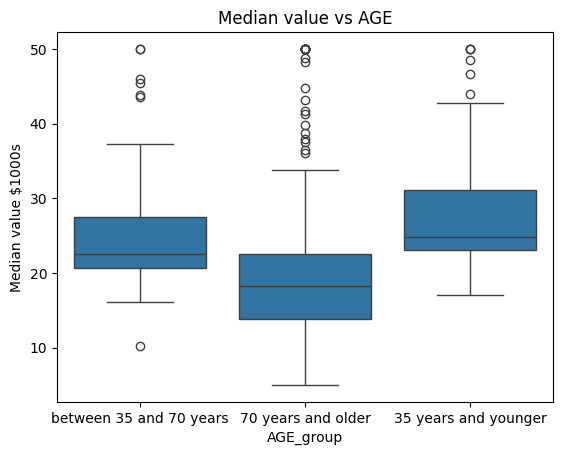

In [10]:
#Task 2.3: boxplot for the MEDV vs AGE
boston_df.loc[boston_df['AGE']<=35, 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE']>=70, 'AGE_group'] = '70 years and older'

ax = sns.boxplot(x = 'AGE_group', y = 'MEDV', data = boston_df)
ax.set_title('Median value vs AGE')
ax.set_ylabel('Median value $1000s')
pyplot.show()

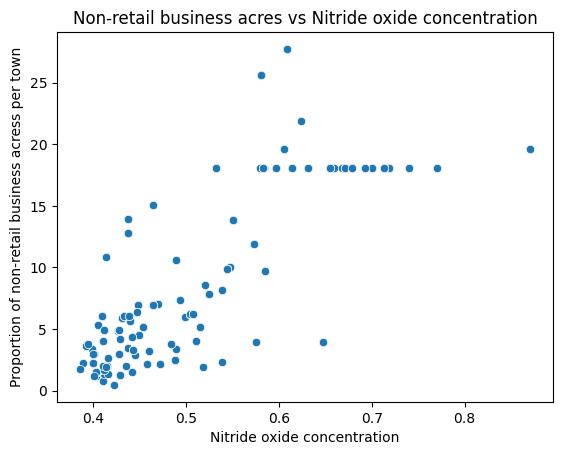

In [15]:
#Task 2.4: scatterplot for Nitric oxide concentrations vs proportion of non-retail business acres per town

ax = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax.set_title ('Non-retail business acres vs Nitride oxide concentration')
ax.set_xlabel('Nitride oxide concentration')
ax.set_ylabel('Proportion of non-retail business acress per town')

pyplot.show()

#qualitatively the 2 variables seems to be correlated, ad the proportion of non-retail business acres per town increases and nitride oxide concentration increases

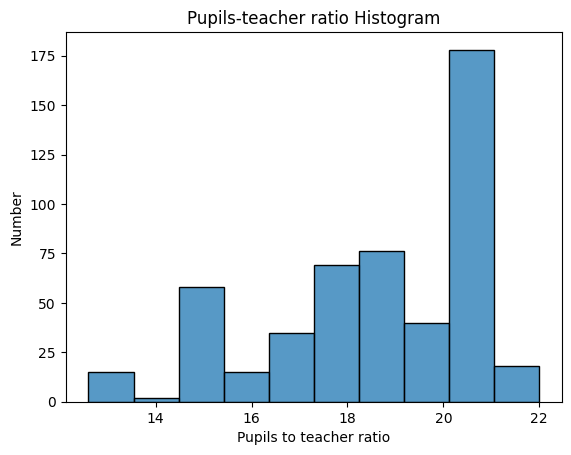

In [24]:
#Task 2.5: histogram for pupil to teacher ratio

ax = sns.histplot(data = boston_df['PTRATIO'], bins = 10)
ax.set_title('Pupils-teacher ratio Histogram')
ax.set_ylabel('Number')
ax.set_xlabel('Pupils to teacher ratio')
pyplot.show()

# TASK 3

In [30]:
#Task 3.1: t-test
#Null Hypothesis: No difference in median value of houses bounded by the Charles river or not
#Alternative Hypothesis: Difference in median value of houses bounded by the Charles river or not

#test for variances dfference
levene_stats = scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center = 'mean')
print(levene_stats)
#significant difference in variances

ttest_stats = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)
print(ttest_stats)

#since pvalue = 0.00357 < 0.05, there is sufficient evidence to reject the null hypothesis and there is sufficient evidence to say that being bounded by the Charles river affects the median value of the houses

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


In [43]:
#Task 3.2: ANOVA
#Null hypothesis: No difference in median value of houses for each AGE group
#Alternative hypothesis: Difference in median value of houses for each AGE group

MEDV_lower35 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
MEDV_between35_70 = boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV']
MEDV_higher70 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

levene_stats = scipy.stats.levene(MEDV_lower35, MEDV_between35_70, MEDV_higher70, center = 'mean')
print(levene_stats)

anova_stats = scipy.stats.f_oneway(MEDV_lower35, MEDV_between35_70, MEDV_higher70)
print(anova_stats)

#being p-value = 1.71e-15<0.05 there is sufficient evidence to reject the null hypothesis and state that there is significant difference in median value of houses for each AGE group

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)
F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


In [45]:
#Task 3.3: Pearson correlation test
#Null hypothesis: no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
#Alternative Hypothesis: correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

pearsonr_stats = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pearsonr_stats)

#since pvalue< 0.05 there is sufficient evidence to stat<e that there is correlation beween Nitric oxide concentrations and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


In [48]:
#Task 3.4: Regression analysis

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()
#R-squared is 0.062, so R is sqrt(0.062). The correlation coefficient is 0.25 so there is correlation between an additional weighted distance to the five Boston employment 
#centres on the median value of owner occupied homes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        15:27:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""